# Project 3: Math with Op Amps, Modeling distributions
## Abstract
In this weeks lab, we performed two projects. The first part of the lab was to build a circuit that produces an output voltage waveform that is proportional to the time derivative of the input waveform using an Operational amplifier. The second part was to build a circuit that filters out frequencies above a certain cutoff frequency, but leaves lower frequencies unaffected using a kind of "electronic filter". For the first part we were to compare the expected values of the non-inverting input voltage, $V_+$ and output voltage to the values we actually got. When $\frac{dV_{\rm in}}{dt}$ is positive, we expect from our calculations that $ V_{\rm out} $ is 1.4V and when negative we expect $ V_{\rm out} $ to be 2.0V. This is really close to our output value from the graph which expects that $ V_{\rm out} $ should be between 1.5V and 2.0V depending on the sign of $\frac{dV_{\rm in}}{dt}$. 

We expected our value for $ V_+ $ to be around 1.6V, but the graph gave us one that is about 1.7V. This is really close to our expectation value. i.e. about 5% off what we expected.
For the second part, we were to measure the amplitude at a series of input frequencies from well below the "cutoff" frequency (say from 100 Hz or so) to well above the cutoff (maybe 10 kHz or 20 kHz) and compare the measured amplitudes to the expected behavior from the theory. We found out the graph of the log of gain against log of frequency of the measured values was similar to that of the theoretical graph.

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np

## Description, Schematic, Background Discussion, and Results

## 1. Operational Amplifier

An Operational Amplifier, or op-amp for short, is fundamentally a voltage amplifying device designed to be used with external feedback components such as resistors and capacitors between its output and input terminals. These feedback components determine the resulting function or “operation” of the amplifier and by virtue of the different feedback configurations whether resistive, capacitive or both, the amplifier can perform a variety of different operations, giving rise to its name of “Operational Amplifier”. Operational amplifiers are linear devices that have all the properties required for nearly ideal DC amplification and are therefore used extensively in signal conditioning, filtering or to perform mathematical operations such as add, subtract, integration and differentiation.

In this lab, we used an operational amplifier to take derivatives. We took the derivative of a "triangle" wave (similar to the PWM output from the Arduino from last time). We constructed the circuit shown below:

![diff.png](diff.png)

How this circuit performs differentiation is that it produces an output voltage waveform that is proportional to the time derivative of the input waveform. We deduced the values our circuit components by applying various circuit laws and the electrical physics concepts. Reminding ourselves the rules that govern the operational amplifiers:

1. No current enters or leaves the inputs.
2. The output voltage adjusts to make $V_+$ and $V_-$ equal.

We used rule number 1 above to deduce the voltage at the + input of the LM324 that we'll call $V_+$. For the input not to draw any current, the current flowing across resistors $R_{T}$ and $R_{B}$ should be at most 0.1mA. Applying Ohm's law and Voltage divider concepts we figured out the values for $R_{T}$ and $R_{B}$. We wanted the voltage at the + input to be 2V because we wouldn't to be any close 3.5V, its maximum output.

$$ V = IR $$

$$ 5 = 0.0001 (R_{T} + R_{B}) $$

$$ 50000 = R_{T} + R_{B} $$

$$ 5 \frac {R_{B}}{R_{T} + R_{B}} = 2 $$

$$ \frac {R_{B}}{R_{T} + R_{B}} = 0.4 $$

$$ 0.6R_{B} = 0.4R_{T} $$

$$ 1.5R_{B} = R_{T} $$

$$ 2.5R_{B} = 50000 $$

$$ R_{B} = 20000 $$

$$ R_{T} = 30000 $$

Therefore, for the voltage input to draw very small current, $R_{B}$ has to be less than 20k $\Omega$ and $R_{T}$ has to be greater than 30k $\Omega$ 

We used an $ R_{T} = 33k \Omega $ and $ R_{B} = 15k \Omega $


Having picked an $R_F$ and $C_{in}$ of 3.3k$\Omega$ and 0.1$\mu$F we wanted to confirm that the differentiator graph below, which represents the output of our circuit, follows the relationship: 
$$ V_{\rm out} = V_+ - R_F C_{\rm in} \frac{dV_{\rm in}}{dt}$$ where $$ I = C_{\rm in}\frac{dV_{\rm in}}{dt}$$

![TEK00001.PNG](TEK00001.PNG)

The yellow square wave represents the output voltage at the output pin of the operational amplifier. The blue trianglular wave is generated by the signal generator. The output voltage is the distance from the midpoint to the end of the square wave. From the graph, we can deduce that our output voltage fluctuates between 1.5V and 2.0V depending on what $ \frac{dV_{\rm in}}{dt} $ is and the input voltage is about 1.7V. We can also deduce that the $\frac{dV_{\rm in}}{dt}$ of the triangular wave is about 1.0$\frac{V}{ms}$. With the known values of $R_F$ and $C_{in}$ we want to confirm they follow the relationship:
$$ V_{\rm out} = V_+ - R_F C_{\rm in} \frac{dV_{\rm in}}{dt}$$ where $$ I = C_{\rm in}\frac{dV_{\rm in}}{dt}$$.

$$ R_F C_{\rm in} \frac{dV_{\rm in}}{dt}  = 3300 \times 1 \times 10^{-7} \times 1000 = 0.3V $$

When $\frac{dV_{\rm in}}{dt}$ is positive, we expect from our calculations that $ V_{\rm out} $ is 1.4V and when negative we expect $ V_{\rm out} $ to be 2.0V. This is really close to our output value from the graph which expects that $ V_{\rm out} $ should be between 1.5V and 2.0V depending on the sign of $\frac{dV_{\rm in}}{dt}$. 

We expected our value for $ V_+ $ to be around 1.6V, but the graph gave us one that is about 1.7V. This is really close to our expectation value. i.e. about 5% off what we expected.

## Electronic Filters

An electronic filter is an arrangement of electronic components used in a circuit to transmit signals within a given frequency range, rejecting others. Electronic filters remove unwanted frequency components from the applied signal, enhance wanted ones, or both. In this lab, we built a circuit the produces a gain of 2 for low frequencies, but rolls off at high frequency. We wanted frequencies above about 1kHz (the "cutoff" frequency) to be "filtered" out. One way would be to put a simple low pass filter on the "front end" of a "gain of 2" non-inverting amplifier. We built the circuit below:

![opamp_circuit.png](opamp_circuit.png)

We applied the idea of voltage divider to figure out what value of resistance we needed to use to get a gain constant of 2. We found out that for the gain constant to be 2, both values of resistance should be the same. 
$$ V_{Out} = \frac{R_3 + R_2}{R_2}V_{in} $$
if $R_2 = R_3$ then 
$$ V_{Out} = \frac{R_2 + R_2}{R_2}V_{in} $$ $$ V_{Out} = 2V_{in} $$ 
Using the reactance formula where $ X_C $ is $\frac {1}{2 \pi fC}$. Knowing that we want any frequency greater than 1kHz (the "cutoff" frequency) to be "filtered" out, we set our resistive reactannce to capacitive reactance and find what value of capacitance we should use. 

$$\frac {1}{2 \pi fC} = 1000 $$
$$ C = \frac {1}{2\pi f (1000)} = C $$
$$ C = 0.2\mu F $$

Capacitance should be close to $ 0.2 \mu F $, therefore, we used a capacitance of $ 0.22 \mu F $. We built the circuit above and got a sinusodial wave function from a sinusodial input.


Below are screenshots from the oscilloscope when we vary frequencies. Frequency values below 1000 Hz and frequency above 1000Hz.

![TEK00007.PNG](TEK00007.PNG)
![TEK00008.pNG](TEK00008.pNG)
![TEK00009.PNG](TEK00009.PNG)
![TEK00010.PNG](TEK00010.PNG)
![TEK00011.PNG](TEK00011.PNG)
![TEK00012.PNG](TEK00012.PNG)
![TEK00013.PNG](TEK00013.PNG)
![TEK00014.PNG](TEK00014.PNG)

Getting the Input and output voltage for each frequency and plotting the frequencies against the gain, we get a graph like the one below.

In [32]:
db = pd.read_csv('Frequency.csv')
db

,Freq,x,y
0,100,0.96,1.92
1,200,0.96,1.92
2,400,0.96,1.72
3,800,0.96,1.28
4,1600,0.96,0.80
5,3200,0.96,0.52
6,6400,0.96,0.32


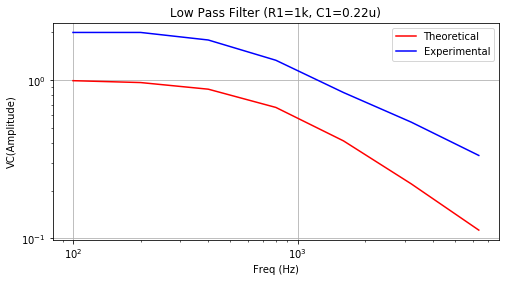

In [60]:
omega = db.Freq*2*np.pi
C = 0.22e-6
R = 1e3
Xc = 1/(omega*C)
z = np.sqrt(R**2 + Xc**2)
Io = 1.0/z
Vc = Io*Xc
g = db.y/db.x

pl.figure(figsize=(8,4))
pl.title("Low Pass Filter (R1=1k, C1=0.22u)")
pl.ylabel("VC(Amplitude)")
pl.xlabel("Freq (Hz)")
pl.grid()
pl.loglog(db.Freq, Vc,'r-', label = "Theoretical")
pl.loglog(db.Freq, g,'b-', label = "Experimental")
pl.legend()

We are required to compare these experimental results to theoretical values. From the graph above it is seen that for both methods, the cut-off frequency is at 1000 Hz.

## Conclusion
In this weeks lab, we performed two projects. The first part of the lab was to build a circuit that produces an output voltage waveform that is proportional to the time derivative of the input waveform using an Operational amplifier. The second part was to build a circuit that filters out frequencies above a certain cutoff frequency, but leaves lower frequencies unaffected using a kind of "electronic filter". For the first part we were to compare the expected values of the non-inverting input voltage, $V_+$ and output voltage to the values we actually got. We expected our value for $ V_+ $ to be around 1.6V, but the graph gave us one that is about 1.7V. This is really close to our expectation value. i.e. about 5% off what we expected. Knowing that $ V_{\rm out} $ depends on the sign of the derivative of the input waveform we got $ V_{\rm out} $ to be bounded between 1.4V and 2.0V which is pretty close to the expected value of 1.5V and 2.0V.
For the second part, we were to measure the amplitude at a series of input frequencies from well below the "cutoff" frequency (say from 100 Hz or so) to well above the cutoff (maybe 10 kHz or 20 kHz) and compare the measured amplitudes to the expected behavior from the theory. We found out the graph of the log of gain against log of frequency of the measured values was similar to that of the theoretical graph.

## Statistical Exercise

### Part 1
Using the example above estimate the number of times you'd expect to see 3 or more defects in less than 10 minutes in an 8 hour shift.

(array([48., 26., 10.,  6.,  3.,  4.,  1.,  1.,  0.,  1.]),
 array([ 0.08615233,  6.14621726, 12.20628219, 18.26634711, 24.32641204,
        30.38647697, 36.4465419 , 42.50660682, 48.56667175, 54.62673668,
        60.68680161]),
 <a list of 10 Patch objects>)

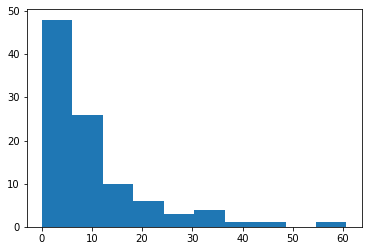

In [42]:
N=10000 
t = -Tau*np.log(1.0-np.random.rand(100))  # get 100 intervals between defects
pl.hist(t)

In [43]:
t[0:-1] + t[1:]

array([ 11.79895853,   7.91269072,   9.55854013,  19.75946762,
        31.90918238,  21.70263646,  19.11152629,  20.43866657,
        15.98387809,  22.30253685,  12.81658663,   4.03474836,
        22.30125464,  25.60074569,  15.25322493,  18.74344277,
        11.95846298,  16.57150101,  12.0647653 ,   2.4103143 ,
         3.34382921,   1.61917004,   5.52247665,  14.15216299,
        14.38969408,  14.25937589,  17.84357987,  15.45797737,
         9.83033552,   4.75384362,  61.89764204, 101.72982068,
        44.22467441,  16.21700612,  16.17746964,  48.14315085,
        59.53371714,  33.75006996,  23.21216491,  21.57276774,
        20.41770378,  38.83327365,  42.67614667,  40.30689201,
        34.96061311,   3.61370505,   8.03923869,  16.64772203,
        45.76209885,  37.08068213,   6.99989355,   5.4015633 ,
        21.05877276,  40.17033458,  24.82718595,  19.54679415,
        15.44266609,   7.72298829,  38.64242286,  37.39629842,
         7.47421827,  27.39087149,  34.20261294,  13.03

In [44]:
# What is the total time for these 100 intervals?

print("Total time:", t.sum())

Total time: 999.705646962072


In [45]:
# What is the averate time between defects for these samples?

print("Average time:", t.mean())

Average time: 9.99705646962072


Minimum time between three successive defects: 1.3876421468136022
Times less than 10: [7.91269072 9.55854013 4.03474836 2.4103143  3.34382921 1.61917004
 5.52247665 9.83033552 4.75384362 3.61370505 8.03923869 6.99989355
 5.4015633  7.72298829 7.47421827 6.42802905 9.17940051 1.38764215
 9.0982733  2.680642   5.38029337 2.50357467 4.45849112 4.7241786
 6.18644189]
Number of times 3 defects happened in less than 10 minutes: 25


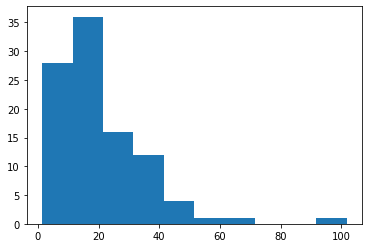

In [47]:
delta3 = t[0:-1] + t[1:]
pl.hist(delta3)
print("Minimum time between three successive defects:", min(delta3))

ThreeInLessThan10 = delta3 < 10
print("Times less than 10:", delta3[np.nonzero(ThreeInLessThan10)])
print("Number of times 3 defects happened in less than 10 minutes:", len(delta3[np.nonzero(ThreeInLessThan10)]))

### Part 2
Suppose you're running a production line 8 hours/day. Suppose you can handle a defect rate of 1 per 10 minutes on the average (6 defects per hour). At the end of 8 hours, what's the expected number of defects unhandled by th end of the day? What if the defect rate goes up by 10% for the last three hours?

In [49]:
finalTime = 60 * 8        # run for eight hours
processTime = 10.0        # how long does it take to process an 
currTime = 0.0            # what time is it now?
nextTime = processTime    # when will the last defect be finished? (it takes 10 minutes to handle a defect)
defectsProcessed = 0      # how many defects have been processed?
defectsOccurred = 0

for delta in t:
    currTime = currTime + delta # when does the next defect appear?

    if currTime > finalTime:
        break # OK, it's the end of the 8 hour shift, break out.

    defectsOccurred += 1  # count the number of defects that have happened.

    if currTime > nextTime:
        nextTime = currTime + processTime # process immediately
    else:
        nextTime = nextTime + processTime # process after this one.
        
    if nextTime<finalTime:
        defectsProcessed += 1
        
print("Defects Occurred:", defectsOccurred)
print("Defects Processed:", defectsProcessed)
print("Backlog:", defectsOccurred-defectsProcessed)

Defects Occurred: 43
Defects Processed: 42
Backlog: 1


When the rate at which defects occur increases by 10% in the last three hours

In [55]:
finalTime = 60 * 5        # run for five hours
processTime = 10.0        # how long does it take to process an 
currTime = 0.0            # what time is it now?
nextTime = processTime    # when will the last defect be finished? (it takes 10 minutes to handle a defect)
defectsProcessed = 0      # how many defects have been processed?
defectsOccurred = 0

for delta in t:
    currTime = currTime + delta # when does the next defect appear?

    if currTime > finalTime:
        break # OK, it's the end of the 8 hour shift, break out.

    defectsOccurred += 1  # count the number of defects that have happened.
    if currTime > nextTime:
        nextTime = currTime + processTime # process immediately
    else:
        nextTime = nextTime + processTime # process after this one.
        
    if nextTime<finalTime:
        defectsProcessed += 1
        
print("Defects Occurred:", defectsOccurred)
print("Defects Processed:", defectsProcessed)
print("Backlog:", defectsOccurred-defectsProcessed)

Defects Occurred: 32
Defects Processed: 28
Backlog: 4


In [56]:
finalTime = 60 * 8       # run for eight hours
processTime = 10.0        # how long does it take to process an 

for delta in t:
    currTime = currTime + delta/1.1 # when does the next defect appear?

    if currTime > finalTime:
        break # OK, it's the end of the 8 hour shift, break out.

    defectsOccurred += 1  # count the number of defects that have happened.
    if currTime > nextTime:
        nextTime = currTime + processTime # process immediately
    else:
        nextTime = nextTime + processTime # process after this one.
        
    if nextTime<finalTime:
        defectsProcessed += 1
        
print("Defects Occurred:", defectsOccurred)
print("Defects Processed:", defectsProcessed)
print("Backlog:", defectsOccurred-defectsProcessed)

Defects Occurred: 56
Defects Processed: 42
Backlog: 14


These results are all gotten from random distributions there is no constant correct answer. The answers could change on any iteration.